In [5]:

import os
from sklearn.cluster import KMeans
from scipy import spatial
from skimage import io, color, img_as_float
import numpy as np
import matplotlib.pyplot as plt
from math import floor

In [6]:
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab4/lena.png
!ls

lena.png  sample_data


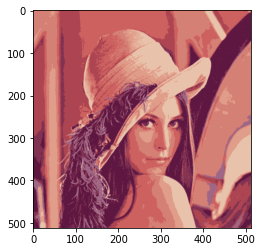

In [17]:
# part 4
# Bugs
# There is index problem with FloydSteinbergDitherColor function. Then i found the index under two for loops will reach the last row and column, so it has to plus 1 for forloop range
# citation: https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering

# Finds the closest colour in the palette using kd-tree.
def nearest(palette, colour):
    dist, i = palette.query(colour)
    return palette.data[i]

# Make a kd-tree palette from the provided list of colours
def makePalette(colours):
    #print(colours)
    return spatial.KDTree(colours)

# Dynamically calculates and N-colour palette for the given image
# Uses the KMeans clustering algorithm to determine the best colours
# Returns a kd-tree palette with those colours
def findPalette(image, nColours):
    h,w,d = image.shape
    d2_image = image.reshape(h*w,d)
    kmeans = KMeans(n_clusters = nColours)
    kmeans.fit(d2_image)
    colours = kmeans.cluster_centers_
    return makePalette(colours)

    return makePalette(colours)
  


def FloydSteinbergDitherColor(image, palette):
#***** The following pseudo-code is grabbed from Wikipedia: https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering.  
  pixel = np.copy(image)
  for y in range(image.shape[0]-1):
    for x in range(image.shape[1]-1):
      oldpixel = pixel[x,y]
      newpixel = nearest(palette,oldpixel)
      pixel[x][y] = newpixel 
      quant_error = oldpixel - newpixel
      pixel[x+1][y] = pixel[x+1][y] + quant_error *(np.float(7/16))
      pixel[x-1][y+1] = pixel[x-1][y+1] + quant_error * (np.float(3/16))
      pixel[x][y+1] = pixel[x][y+1] + quant_error * (np.float(5/16))
      pixel[x+1][y+1] = pixel[x+1][y+1] + quant_error *(np.float(1/16))
        
  return pixel


if __name__ == "__main__":
  
    nColours = 8 # The number colours: change to generate a dynamic palette

    imfile = 'lena.png'

    image = io.imread(imfile)

    # Strip the alpha channel if it exists
    image = image[:,:,:3]

    # Convert the image from 8bits per channel to floats in each channel for precision
    image = img_as_float(image)

    # Dynamically generate an N colour palette for the given image
    palette = findPalette(image, nColours)
    colours = palette.data
    
    colours = img_as_float([colours.astype(np.ubyte)])[0]
    
    img = FloydSteinbergDitherColor(image, palette)

    plt.imshow(img)
    plt.show()